In [1]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Audio, display, Image, YouTubeVideo

In [5]:
filename = 'Paragraph_1.WAV'

In [7]:
y, sr = librosa.load(filename)
# trim silent edges
record1, _ = librosa.effects.trim(y)
Audio(data=record1, rate=sr)

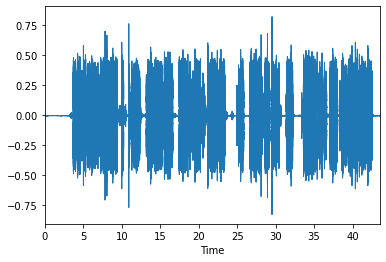

In [8]:
#When talk about sound,sequence of vibrations in varying pressure strengths, so to visualize sound means to visualize air waves
librosa.display.waveplot(record1, sr=sr);

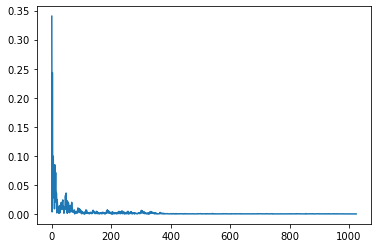

In [9]:
#one dimensional representation of this complex and rich recording
#so Another mathematical representation of sound is the Fourier Transform
#one short time window and see what we get from applying the Fourier Transform.

n_fft = 2048
D = np.abs(librosa.stft(record1[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

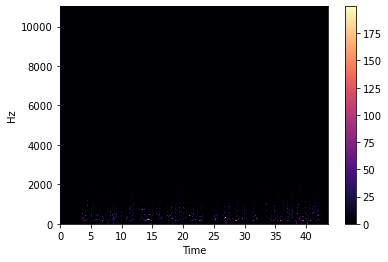

In [10]:
#take the complete recording, separate it to time windows
#apply the Fourier Transform on each time window
hop_length = 512
D = np.abs(librosa.stft(record1, n_fft=n_fft, hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

C:\Users\Imalka\anaconda3\envs\tensorflow\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Imalka\anaconda3\envs\tensorflow\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Imalka\anaconda3\envs\tensorflow\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


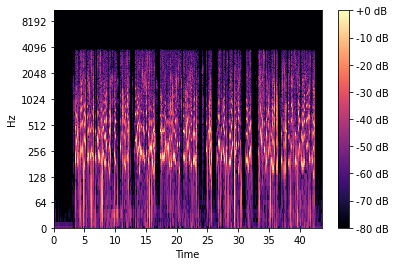

In [11]:
#can't see much.
#It's because most sounds humans hear are concentrated in very small frequency and amplitude ranges.

#transform both the y-axis (frequency) to log scale, and the "color" axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.

DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

In [12]:
#The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale.

#This Mel Scale is constructed such that sounds of equal distance from each other on the Mel Scale, 
#also "sound" to humans as they are equal in distance from one another.

n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

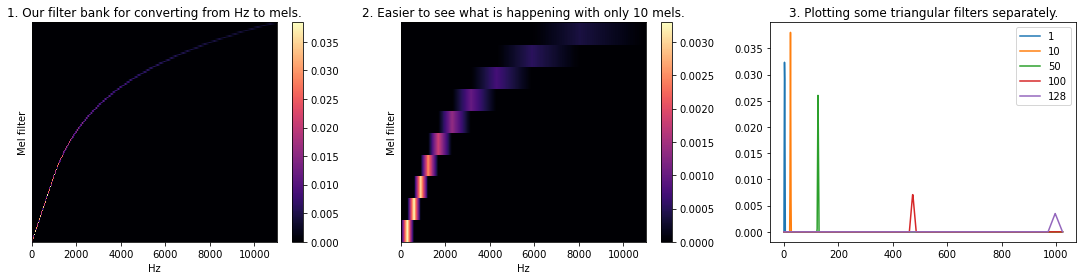

In [13]:
#Now partitions the Hz scale into bins, 
#And transforms each bin into a corresponding bin in the Mel Scale, using a overlapping triangular filters.

plt.figure(figsize=(15, 4));

plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.');


plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.');

plt.subplot(1, 3, 3);
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=['{}'.format(i+1) for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.');

plt.tight_layout();

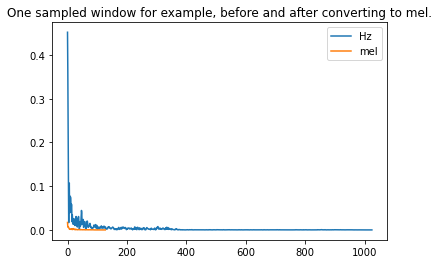

In [14]:
#can take the amplitude of one time window, 
#compute the dot product with mel to perform the transformation, 
#and get a visualization of the sound in this new frequency scale.

plt.plot(D[:, 1]);
plt.plot(mel.dot(D[:, 1]));
plt.legend(labels=['Hz', 'mel']);
plt.title('One sampled window for example, before and after converting to mel.');

C:\Users\Imalka\anaconda3\envs\tensorflow\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Imalka\anaconda3\envs\tensorflow\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


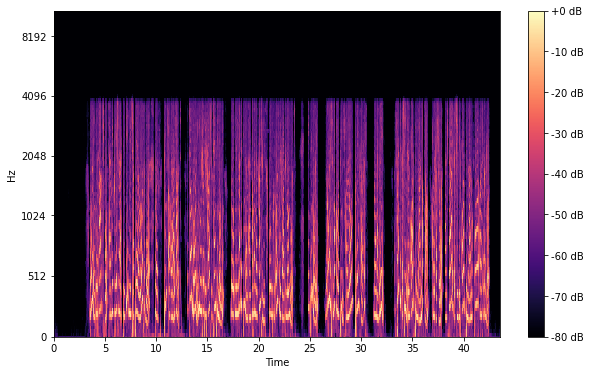

In [15]:
#generate a Mel Spectrogram

S = librosa.feature.melspectrogram(record1, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 6));
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [16]:
# Sanity check that indeed we understood the underlying pipeline

S = librosa.feature.melspectrogram(record1, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

fft_windows = librosa.stft(whale_song, n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(fft_windows)**2
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

assert (mel.dot(magnitude) == S).all()